In [11]:
!pip install tweepy
import tweepy
import time
import csv
import threading
lock = threading.Lock()
from nltk.tokenize import word_tokenize
import string
import nltk
import twikenizer as twk
twk = twk.Twikenizer()
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
with open("./twitter_API.txt",'r') as token_file:
    contents = token_file.read().split('\n')
    consumer_key = contents[0]
    consumer_secret = contents[1]
    access_token = contents[2]
    access_token_secret = contents[3]
    
print(consumer_key,consumer_secret,access_token,access_token_secret,sep='\n')

qczJfz5mBRhWyCLwjICrXbaDe
vdgGqjZjfOagt00tKOCfgUFz7BlEgIQuhSM5bQqSLtfCmfZNxR
1055266392788873218-TEOrczbmpvnFb7PtWg56HveqtRBmcD
qQRInhGwvRdqfy9TlOJjOSyEqh41UhBjHWOwMROl5WzEi


In [10]:
# set the key and token
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
search_term = 'AAPL'
## fill in your search query and store your results in a variable
results = api.search(q = search_term, lang = "en", result_type = "recent", count = 1000)

In [12]:
# the user id of the celebrities
user_id_dict = {'Donald J. Trump':25073877,'Elizabeth Warren':357606935,'Bernie Sanders':216776631,'Kamala Harris':30354991,'Beto ORourke':342863309,'Kirsten Gillibrand':72198806,'Amy Klobuchar':33537967,'Cory Booker':15808765,'Julián Castro':19682187}
user_ids = []
for i in user_id_dict:
    user_ids.append(user_id_dict[i])
user_ids

[25073877,
 357606935,
 216776631,
 30354991,
 342863309,
 72198806,
 33537967,
 15808765,
 19682187]

In [15]:
# get the text of all tweets of those users
def get_tweets(user_ids):
    old_ids = []
    output = []
    lock.acquire()
    try:
        num = 0
        while len(user_ids) >= 1:
            try:
                user_id = user_ids[num]
                print('crawling user %s data...' % user_id)
                auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
                auth.set_access_token(access_token, access_token_secret)
                api = tweepy.API(auth)
                tweets = []
                new_tweets = api.user_timeline(user_id, count=1000,tweet_mode='extended')
                tweets.extend(new_tweets)
                old = tweets[-1].id - 1
                while len(new_tweets) > 0:
                    new_tweets = api.user_timeline(user_id=user_id, count=1000, max_id=old,tweet_mode='extended')
                    tweets.extend(new_tweets)
                    old = tweets[-1].id - 1
                    print('%s tweets downloaded' % (len(tweets)))
               
                # We output the id, text, time, favorits and retweets of the original tweet.
                out_tweets = [[tweet.id, tweet.created_at, tweet.full_text,tweet.favorite_count,
                               tweet.retweet_count, tweet.user.id, tweet.user.name,
                               tweet.user.followers_count,tweet.user.created_at] for tweet in tweets]

                #print(out_tweets)
                output.append(out_tweets)
                user_ids.remove(user_id)
                old_ids.append(user_id)
                
                # Write the result to a csv file.
                with open('./%s_tweets.csv' % (str(user_id)+'_'+tweets[0].user.name), 'w',encoding='utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerows(out_tweets)
                print('saved data')
                
            except tweepy.TweepError as e:
                if e.reason=='Not authorized.':
                    print('this user not authorized.')
                    user_ids.remove(user_id)
                    old_ids.append(user_id)
                    continue
                else:print(e)
        #return output
    finally:
        lock.release()

In [31]:
# Get trump's tweet data and sve it to a csv
for i in user_ids:
    get_tweets([i])
    

crawling user 25073877 data...
400 tweets downloaded
599 tweets downloaded
599 tweets downloaded
saved data
crawling user 357606935 data...
400 tweets downloaded
600 tweets downloaded
800 tweets downloaded
1000 tweets downloaded
1200 tweets downloaded
1400 tweets downloaded
1600 tweets downloaded
1800 tweets downloaded
2000 tweets downloaded
2200 tweets downloaded
2400 tweets downloaded
2600 tweets downloaded
2800 tweets downloaded
3000 tweets downloaded
3200 tweets downloaded
3218 tweets downloaded
3218 tweets downloaded
saved data
crawling user 216776631 data...
400 tweets downloaded
600 tweets downloaded
800 tweets downloaded
1000 tweets downloaded
1200 tweets downloaded
1400 tweets downloaded
1600 tweets downloaded
1800 tweets downloaded
2000 tweets downloaded
2200 tweets downloaded
2400 tweets downloaded
2600 tweets downloaded
2800 tweets downloaded
3000 tweets downloaded
3200 tweets downloaded
3230 tweets downloaded
3230 tweets downloaded
saved data
crawling user 30354991 data...

In [37]:
get_tweets([25073877])

crawling user 25073877 data...
400 tweets downloaded
599 tweets downloaded
799 tweets downloaded
999 tweets downloaded
1198 tweets downloaded
1398 tweets downloaded
1598 tweets downloaded
1798 tweets downloaded
1997 tweets downloaded
2197 tweets downloaded
2397 tweets downloaded
2597 tweets downloaded
2797 tweets downloaded
2797 tweets downloaded
saved data


In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re

def data_process(name):
    datafile = name
    df_raw = pd.read_csv(datafile,header=None,names = ['tweetid','date','content','like','repo','id','name','followers','time'])
    df_raw['date'] = df_raw['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    df_raw['year'] = df_raw['date'].apply(lambda x:x.year)
    df_raw['month'] = df_raw['date'].apply(lambda x:x.month)
    df_raw['week'] = df_raw['date'].apply(lambda x:x.week)
    return df_raw.groupby(['year','week'])[['like','repo']].mean()


In [2]:
file_name = ['25073877_Donald J. Trump_tweets.csv','216776631_Bernie Sanders_tweets.csv','19682187_Julián Castro_tweets.csv','15808765_Cory Booker_tweets.csv','30354991_Kamala Harris_tweets.csv','33537967_Amy Klobuchar_tweets.csv',"342863309_Beto O'Rourke_tweets.csv",'357606935_Elizabeth Warren_tweets.csv','72198806_Kirsten Gillibrand_tweets.csv']

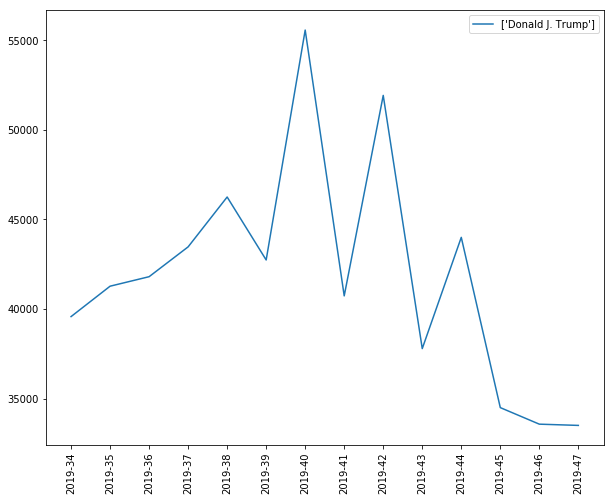

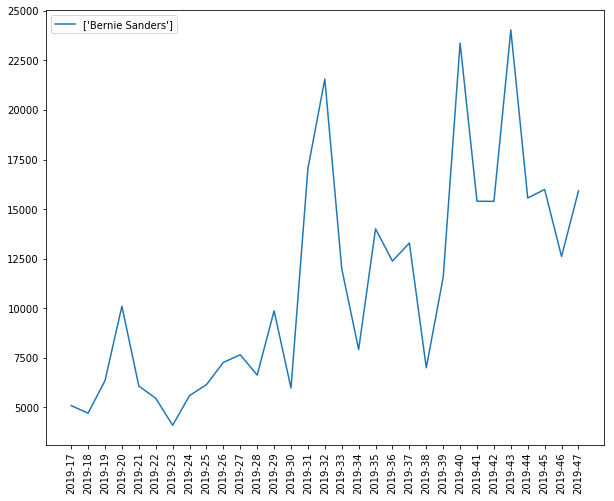

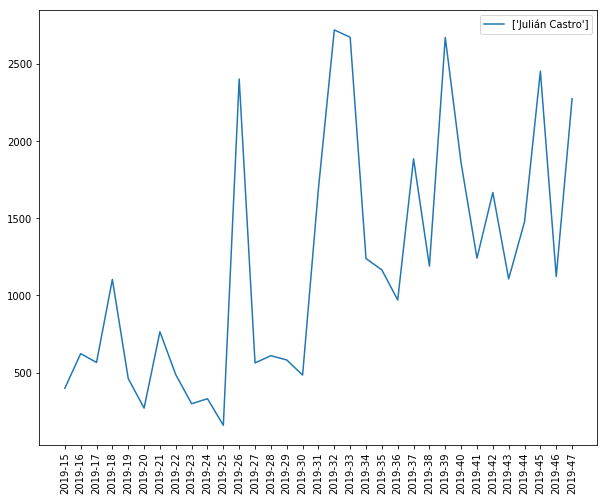

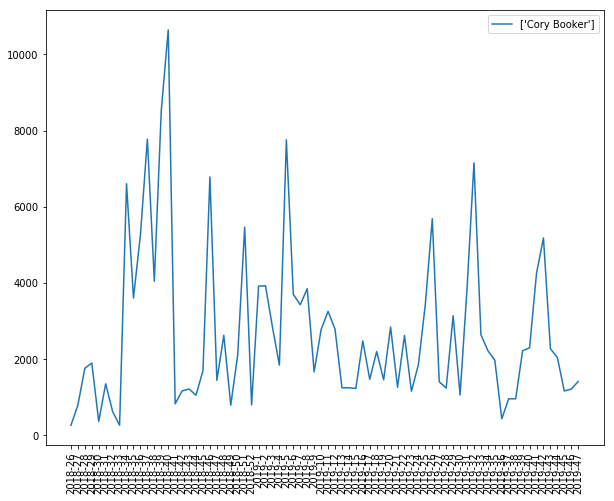

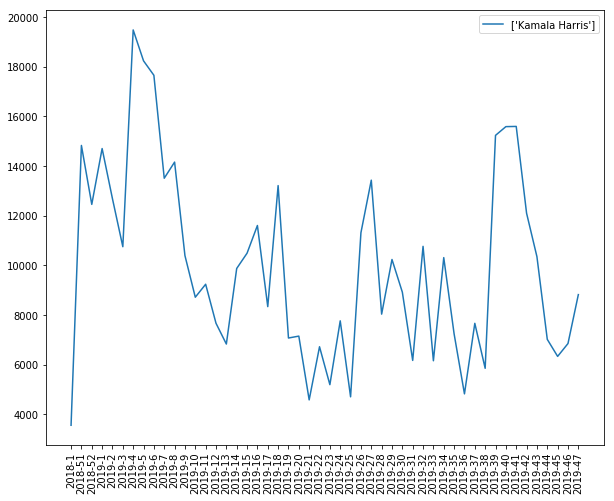

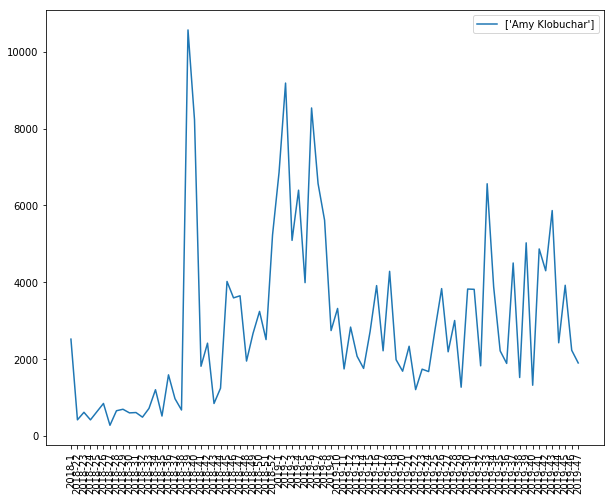

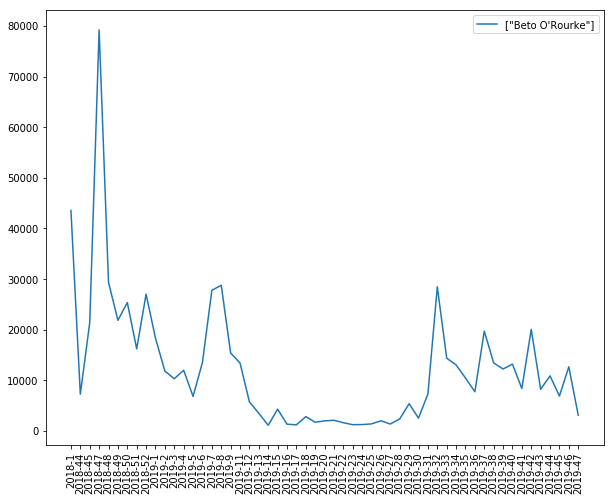

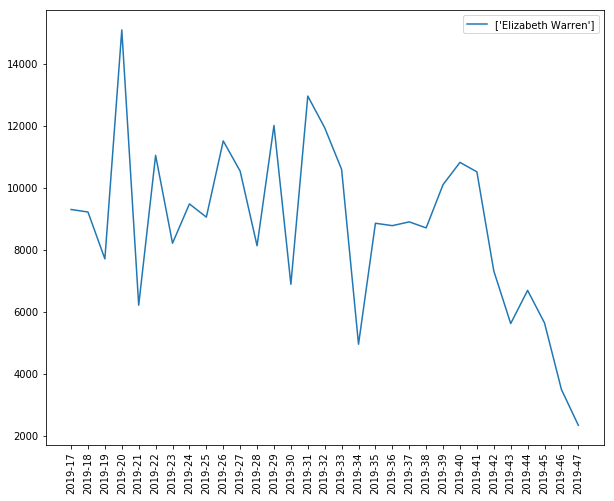

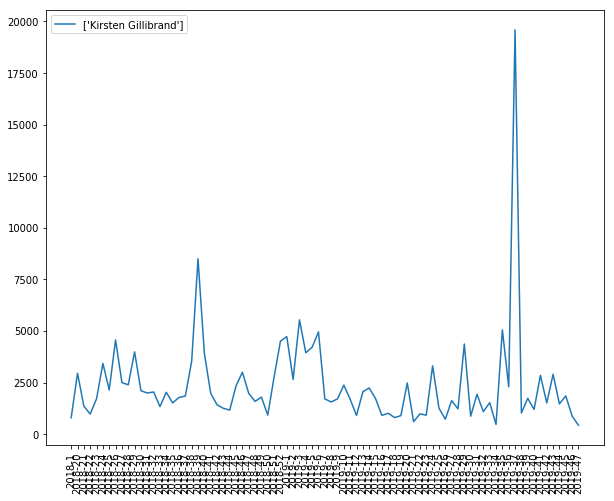

In [3]:
def plotlike_average(candidate_file):
    date = []
    for j in data_process(candidate_file).index:
        date.append(str(j[0])+'-'+str(j[1]))
    name = re.findall("_(.*?)_",candidate_file)
    plt.figure(figsize=(10,8))
    plt.plot(date[:-1],data_process(candidate_file)['like'][:-1],label=name)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

for i in file_name:
    plotlike_average(i)

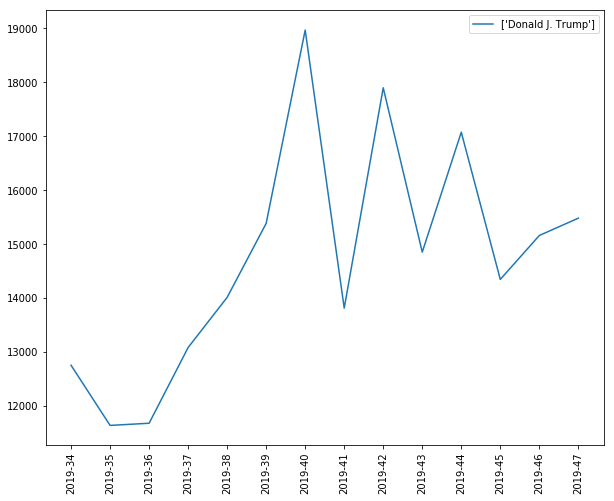

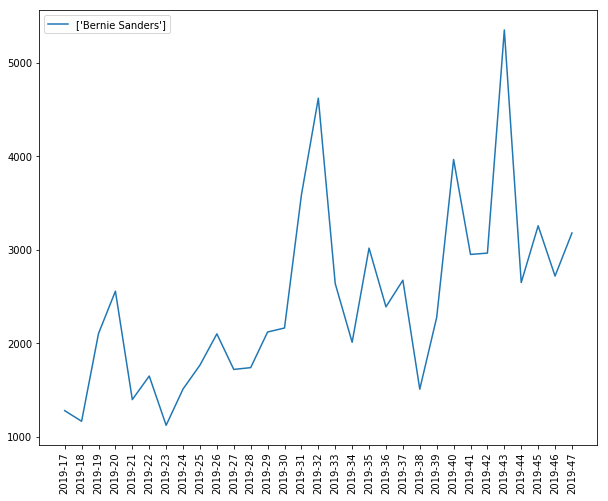

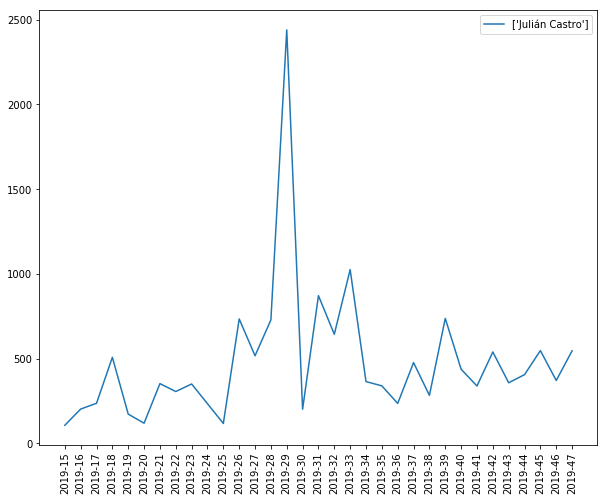

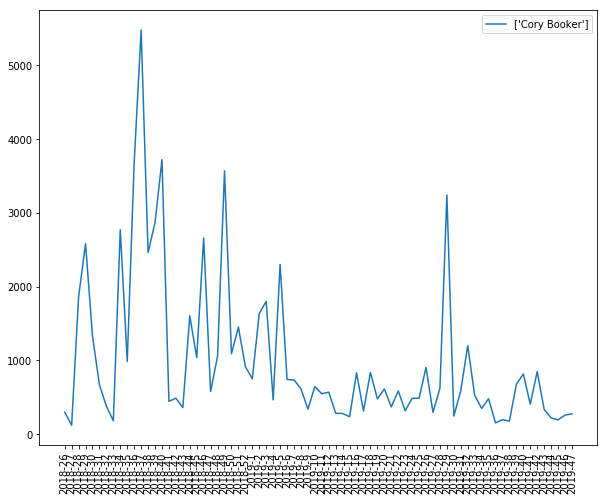

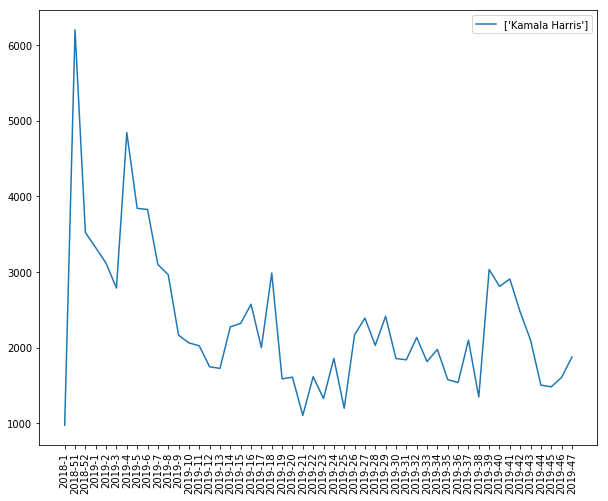

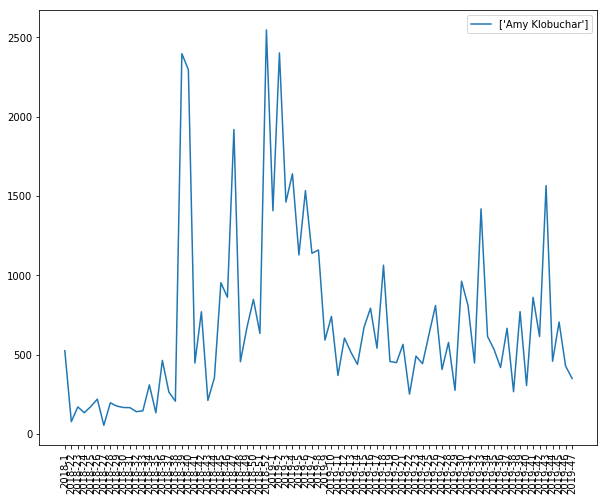

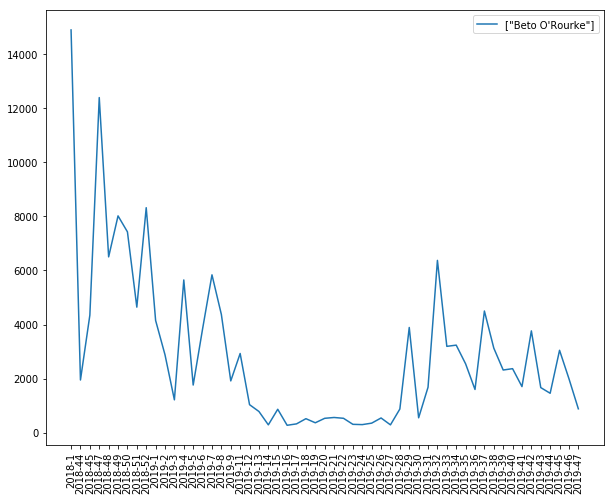

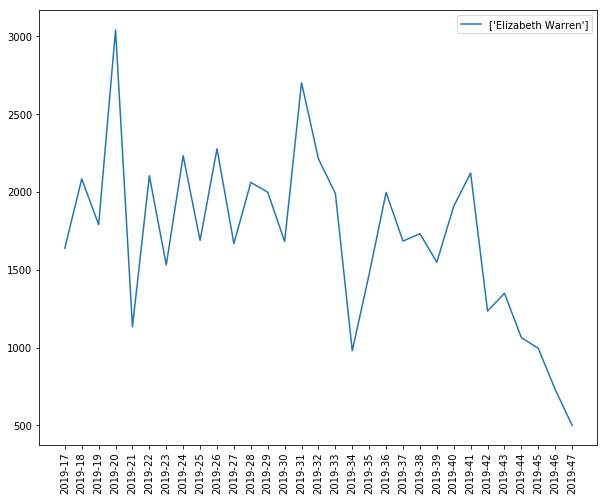

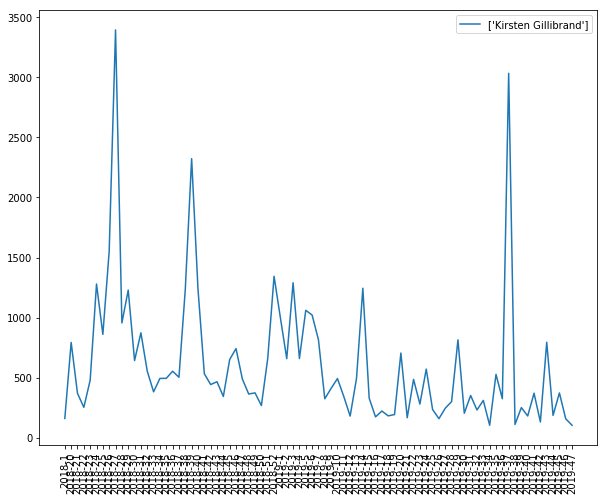

In [4]:
def plotrepo_average(candidate_file):
    date = []
    for j in data_process(candidate_file).index:
        date.append(str(j[0])+'-'+str(j[1]))
    name = re.findall("_(.*?)_",candidate_file)
    plt.figure(figsize=(10,8))
    plt.plot(date[:-1],data_process(candidate_file)['repo'][:-1],label=name)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

for i in file_name:
    plotrepo_average(i)

In [10]:
def data_processing(name):
    datafile = name
    df_raw = pd.read_csv(datafile,header=None,names = ['tweetid','date','content','like','repo','id','name','followers','time'])
    df_raw['date'] = df_raw['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return df_raw

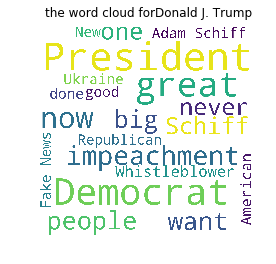

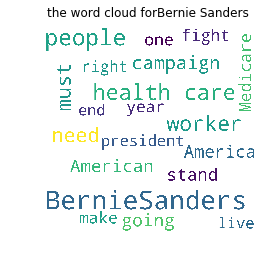

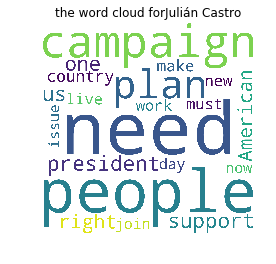

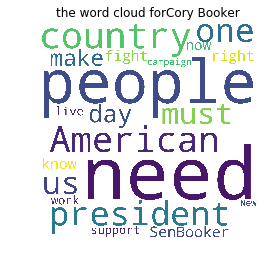

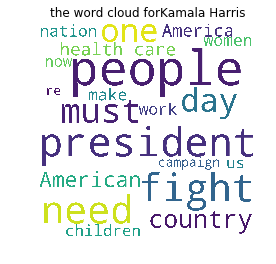

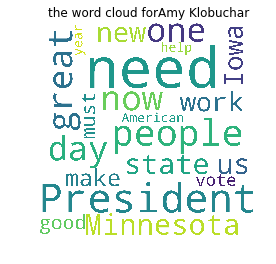

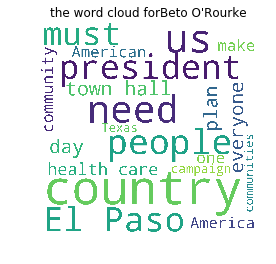

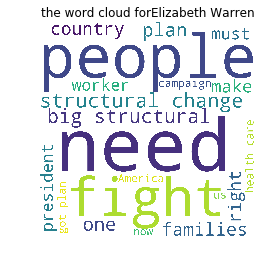

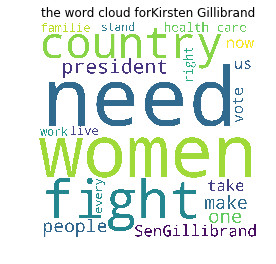

In [36]:
def word_cloud(candidate_file):
    text = ''
    stop_words = ["https", "co", "RT", 'http', '@','amp','will','Trump','realDonaldTrump','BernieSander','JulianCastro','CoryBooker','today','Thank','BetoORourke','time','Thanks','Thank you','Thankyou'] + list(STOPWORDS)
    for i in data_processing(candidate_file)['content']:
        text +=i
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',width=3000,height=3000,max_words=20).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    name = re.findall("_(.*?)_",candidate_file)
    #print(name)
    plt.title('the word cloud for '+str(name[0]))
    plt.show()
    
for i in file_name:
    word_cloud(i)

In [37]:
#df_raw = pd.read_csv(file_name[0],header=None,names = ['tweetid','date','content','like','repo','id','name','followers','time'])
#df_raw['ton']=df_raw['content'][0:100].apply(lambda x:twk.tokenize(x))
#df_raw.head(100)